Your objective is to build a Bubble Plot that showcases the relationship between four key variables:

-Average Fare ($) Per City
-Total Number of Rides Per City
-Total Number of Drivers Per City
-City Type (Urban, Suburban, Rural)


In addition, you will be expected to produce the following three pie charts:

% of Total Fares by City Type
% of Total Rides by City Type
% of Total Drivers by City Type

As final considerations:

You must use the Pandas Library and the Jupyter Notebook.
You must use the Matplotlib library.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles, Axes Labels, Legend Labels, Wedge Percentages, and Wedge Labels.
Remember when making your plots to consider aesthetics!

You must stick to the Pyber color scheme (Gold, Light Sky Blue, and Light Coral) in producing your plot and pie charts.
When making your Bubble Plot, experiment with effects like alpha, edgecolor, and linewidths.
When making your Pie Chart, experiment with effects like shadow, startangle, and explosion.

In [20]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_df= pd.read_csv("city_data.csv")
ride_data_df= pd.read_csv("ride_data.csv")

# Combine the data into a single dataset
# Display the data table for preview
combined_data = pd.merge(ride_data_df, city_data_df, how="left", on = "city")
combined_data.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

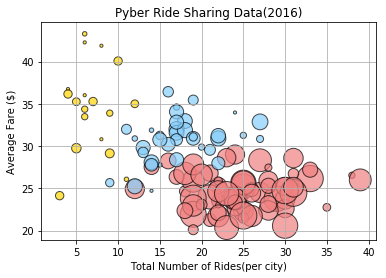

In [28]:
# Obtain the x and y coordinates for each of the three city types

#urban
cg= combined_data.groupby(["type"]).get_group("Urban").groupby(["city"])
x_urban= cg["fare"].count()
y_urban= cg["fare"].mean()
z_urban= cg["driver_count"].min()

#suburban
cg= combined_data.groupby(["type"]).get_group("Suburban").groupby(["city"])
x_suburban= cg["fare"].count()
y_suburban= cg["fare"].mean()
z_suburban= cg["driver_count"].min()

#Rural
cg= combined_data.groupby(["type"]).get_group("Rural").groupby(["city"])
x_rural= cg["fare"].count()
y_rural= cg["fare"].mean()
z_rural= cg["driver_count"].min()

#color
#lightcoral	#F08080
#lightslyblue #87CEFA
#Gold #FFD700

plt.scatter(x_urban, y_urban, marker="o", facecolors="#F08080", edgecolors="black", s=10*z_urban, alpha=0.7)
plt.scatter(x_suburban, y_suburban, marker="o", facecolors="#87CEFA", edgecolors="black", s=10*z_suburban, alpha=0.7)
plt.scatter(x_rural, y_rural, marker="o", facecolors="#FFD700", edgecolors="black", s=10*z_rural, alpha=0.7)

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel("Total Number of Rides(per city)")
plt.ylabel("Average Fare ($)")
plt.grid()
plt.savefig("pyberridesharingdata.png")
plt.show()

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


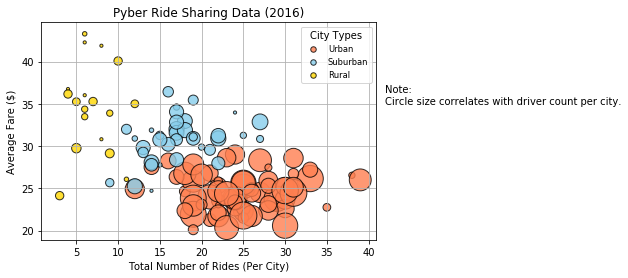

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

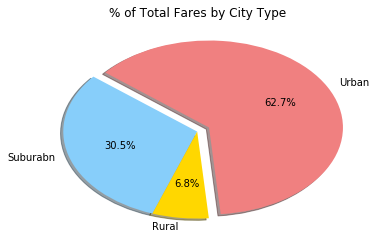

In [60]:
# Calculate Type Percents
pies = ["Urban", "Suburabn", "Rural"]

sum_urban=combined_data.groupby(["type"]).get_group("Urban")["fare"].sum()
sum_suburban=combined_data.groupby(["type"]).get_group("Suburban")["fare"].sum()
sum_rural=combined_data.groupby(["type"]).get_group("Rural")["fare"].sum()
sum_fare=[sum_urban, sum_suburban, sum_rural]

explode=(0.1,0,0)
colors= ["#F08080", "#87CEFA", "#FFD700"]
plt.pie(sum_fare, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=275)
plt.title("% of Total Fares by City Type")
plt.savefig("TotalFaresbyCityType.png")
plt.show()

# Build Pie Chart

# Save Figure


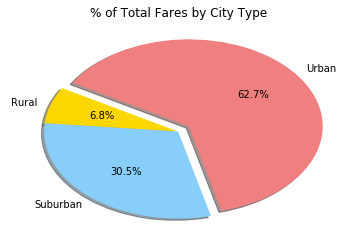

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

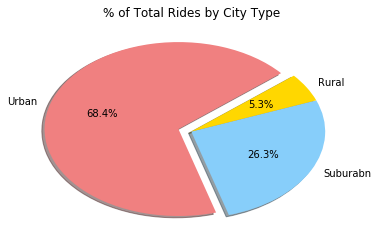

In [57]:
# Calculate Ride Percents
pies = ["Urban", "Suburabn", "Rural"]

ride_urban=combined_data.groupby(["type"]).get_group("Urban")["date"].count()
ride_suburban=combined_data.groupby(["type"]).get_group("Suburban")["date"].count()
ride_rural=combined_data.groupby(["type"]).get_group("Rural")["date"].count()
sum_ride=[ride_urban, ride_suburban, ride_rural]

explode=(0.1,0,0)
colors= ["#F08080", "#87CEFA", "#FFD700"]
plt.pie(sum_ride, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=40)
plt.title("% of Total Rides by City Type")
plt.savefig("TotalRidesbyCityType.png")
plt.show()

# Build Pie Chart

# Save Figure


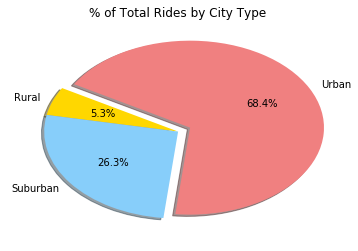

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

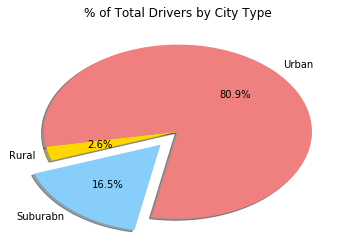

In [58]:
# Calculate Driver Percents

pies = ["Rural", "Suburabn", "Urban"]

driver_sum=city_data_df.groupby(["type"])["driver_count"].sum()

explode=(0,0.2,0)
colors= ["#FFD700", "#87CEFA", "#F08080"]
plt.pie(driver_sum, explode=explode, labels=pies, colors=colors, autopct="%1.1f%%", shadow=True, startangle=190)
plt.title("% of Total Drivers by City Type")
plt.savefig("TotalDriversbyCityType.png")
plt.show()


# Build Pie Charts

# Save Figure


In [59]:
# Show Figure
plt.show()

In [142]:
combined_data["driver_count"].dtype

dtype('int64')

# concolusion:
There are more rides and drivers in urban area compared to other type of city. That leads to the lower fare of the rides in urban area.